# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/root/GWData-Bootcamp/2023/machine_learning/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
data.shape

(112915, 11)

------------
## Drop na

In [4]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [5]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [6]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [7]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 百分之20用于测试

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.metrics import confusion_matrix
# 绘制混淆矩阵函数
def confusion_matrix_draw(cm):
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


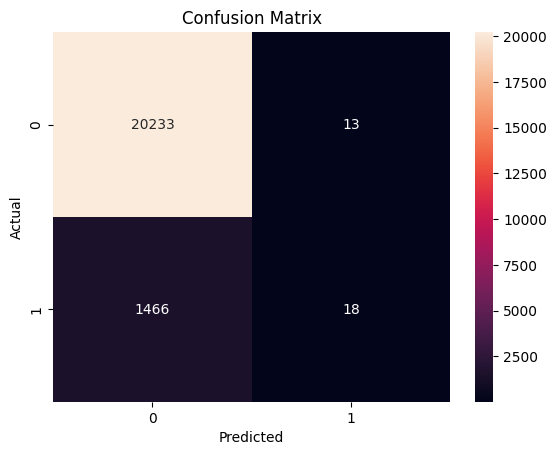

In [11]:
from sklearn.linear_model import LogisticRegression


# 创建 Logistic Regression 分类器
classifier = LogisticRegression()

# 使用训练集拟合分类器
classifier.fit(X_train, y_train)

# 使用分类器进行预测
y_pred = classifier.predict(X_test)

# 使用分类器进行预测并获得混淆矩阵
cm_Logisticregression = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
confusion_matrix_draw(cm_Logisticregression)

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

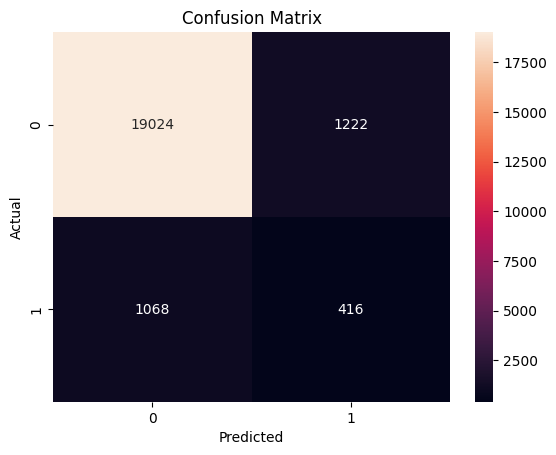

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 创建决策树分类器
classifier = DecisionTreeClassifier()

# 使用训练集拟合分类器
classifier.fit(X_train, y_train)

# 使用分类器进行预测
y_pred = classifier.predict(X_test)

# 使用分类器进行预测并获得混淆矩阵
cm_DecisionTreeClassifier = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
confusion_matrix_draw(cm_DecisionTreeClassifier)

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

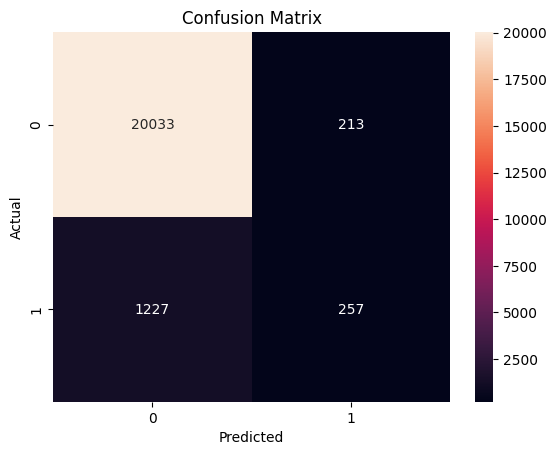

In [13]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
classifier = RandomForestClassifier()

# 使用训练集拟合分类器
classifier.fit(X_train, y_train)

# 使用分类器进行预测
y_pred = classifier.predict(X_test)

# 使用分类器进行预测并获得混淆矩阵
cm_RandomForestClassifier = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
confusion_matrix_draw(cm_RandomForestClassifier)


### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

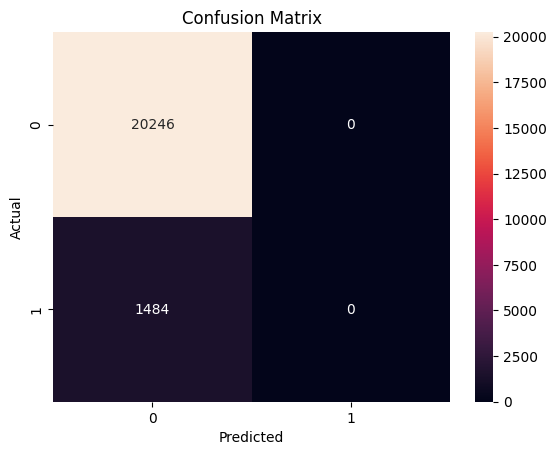

In [14]:
from sklearn.svm import SVC

# 创建支持向量机分类器
classifier = SVC()

# 使用训练集拟合分类器
classifier.fit(X_train, y_train)

# 使用分类器进行预测
y_pred = classifier.predict(X_test)

# 使用分类器进行预测并获得混淆矩阵
cm_SVC = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
confusion_matrix_draw(cm_SVC)

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

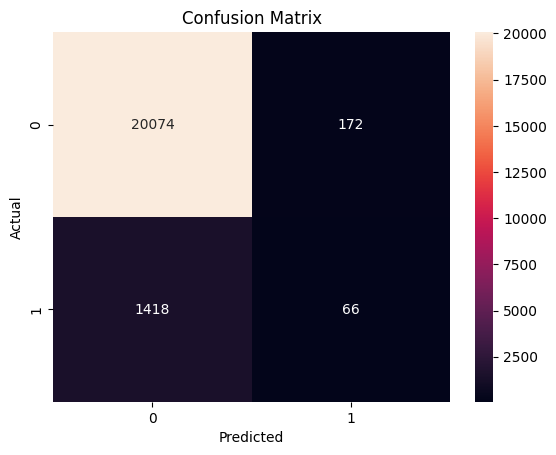

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# 创建K最近邻分类器，设置邻居数为3
classifier = KNeighborsClassifier(n_neighbors=3)

# 使用训练集拟合分类器
classifier.fit(X_train, y_train)

# 使用分类器进行预测
y_pred = classifier.predict(X_test)

# 使用分类器进行预测并获得混淆矩阵
cm_KNN = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
confusion_matrix_draw(cm_KNN)

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [16]:
from sklearn.metrics import accuracy_score
# 封装计算函数
def calAccuracy(cm):
    # 提取混淆矩阵中的真正例和真负例的数量
    tn, fp, fn, tp = cm.ravel()

    # 计算准确率
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # 打印准确率
    print("准确率:", accuracy)

In [17]:
calAccuracy(cm_Logisticregression)

准确率: 0.9319374137137598


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [18]:
calAccuracy(cm_DecisionTreeClassifier)

准确率: 0.8946157386102163


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [19]:
calAccuracy(cm_RandomForestClassifier)

准确率: 0.9337321675103544


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [20]:
calAccuracy(cm_SVC)

准确率: 0.9317073170731708


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [21]:
calAccuracy(cm_KNN)

准确率: 0.926829268292683


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [22]:
## your code here

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

# 训练Logistic Regression模型
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 根据阈值调整概率判定边界
threshold = 0.3
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率
y_pred = (y_pred_prob >= threshold).astype(int)  # 根据阈值判断最终结果

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 输出评估指标
print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.9312931431201105
Recall: 0.03706199460916442


/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
